In [1]:
using Statistics
using MAT
using Measures
using DelimitedFiles
using Plots
using FFTW
include("FluidNetworkTools_noMATLAB.jl")

SystemError: SystemError: opening file "/Users/samueldouglass/Dropbox/School/MS/Research/UNR_fluids/DouglassNair/~Thesis/figures/baseline_flow/FluidNetworkTools_noMATLAB.jl": No such file or directory

# Body Movement
---

In [2]:
fileIn = matopen("./q_files/Re200_kb_0.625_Q_mg_3.mat")

q_hist  = read(fileIn, "q_hist") 
xb  = read(fileIn, "x_body") 
yb  = read(fileIn, "y_body") 
ẏb = read(fileIn, "vxb") 
ẋb = read(fileIn, "vyb") 

close(fileIn)

ErrorException: File "./q_files/Re200_kb_0.625_Q_mg_3.mat" does not exist and create was not specified

In [3]:
itr = 100

plot()
plot!(xb[:,itr-10], yb[:,itr-10])
plot!(collect(range(0, 1, length = 66)).*cosd(35), -collect(range(0, 1, length = 66)).*sind(35), c = :black, linestyle = :dash) 
plot!(xb[:,itr+20], yb[:,itr+20])
p_save = plot!(mean(xb, dims = 2), mean(yb, dims = 2), c = :red, linestyle = :dash)



# p[:plot_title] = "Trailing Edge Deflection";

savefig(p_save,"./plots/body_limits.png")

p_save


UndefVarError: UndefVarError: xb not defined

In [4]:
plot()

for itr = 1:1:size(yb)[2]
    plot!(xb[:,itr], yb[:,itr], legend = :false, c = :black, linealpha = 0.01)
end
# plot!(xb[:,itr-10], yb[:,itr-10])
plot!(collect(range(0, 1, length = 66)).*cosd(35), -collect(range(0, 1, length = 66)).*sind(35), c = :black, linestyle = :dash) 
# plot!(xb[:,itr+20], yb[:,itr+20])
p_save = plot!(mean(xb, dims = 2), mean(yb, dims = 2), c = :red, linestyle = :dash, grid=false)


# p[:plot_title] = "Trailing Edge Deflection";

savefig(p_save,"./plots/body_ghost.png")

p_save

UndefVarError: UndefVarError: yb not defined

In [5]:
size(yb)[2]

UndefVarError: UndefVarError: yb not defined

In [6]:
plot(yb[end,:])

UndefVarError: UndefVarError: yb not defined

# Re_kb Compare
---

In [7]:
Re_list = ["Re200" "Re100" "Re50"];
kb_list = ["kb_0.15625" "kb_0.3125" "kb_0.625"];

xb_list = []
yb_list = []
ẋb_list = []
ẏb_list = []

for re ∈ Re_list
    for kb ∈ kb_list
        file = "./q_files/" * re * "_" * kb * "_Q.mat"
        fileIn = matopen(file)

        xb = read(fileIn, "x_body") 
        yb = read(fileIn, "y_body") 
        ẏb = read(fileIn, "vxb") 
        ẋb = read(fileIn, "vyb") 

        push!(xb_list, xb)
        push!(yb_list, yb)
        push!(ẋb_list, ẋb)
        push!(ẏb_list, ẏb)

        close(fileIn)

    end
end

ErrorException: File "./q_files/Re200_kb_0.15625_Q.mat" does not exist and create was not specified

In [8]:
plot_list = []

t_span = 0:0.025:1250*0.025

for i = 1:1:9

    p = plot(t_span, yb_list[i][end,:], grid=false)

    push!(plot_list,p)

end

BoundsError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

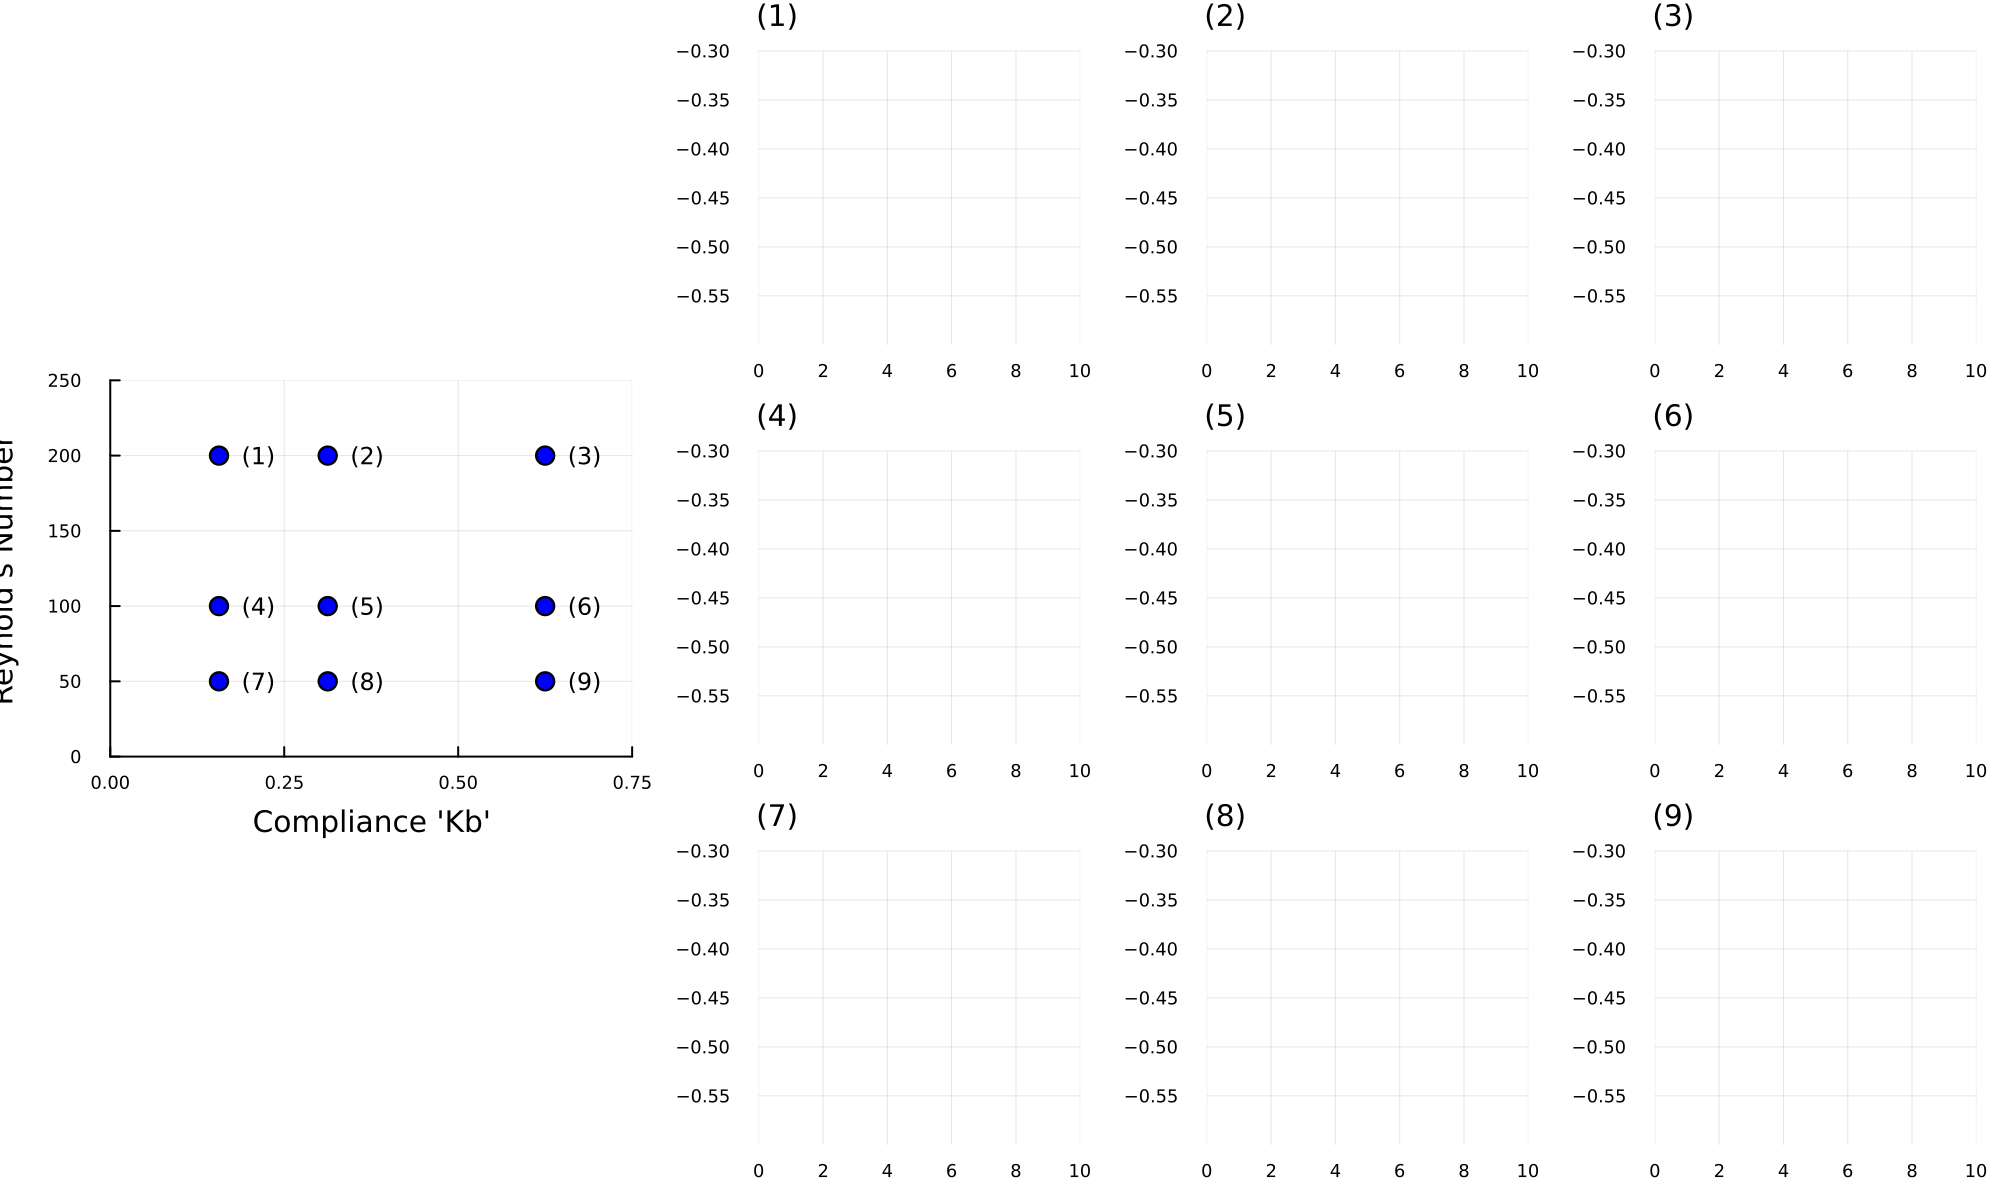

In [9]:
Re = [50 50 50 100 100 100 200 200 200]
kb = [0.15625 0.3125 0.625 0.15625 0.3125 0.625 0.15625 0.3125 0.625]



p01 = plot(ticks = :false, axis = :false)

p00 = scatter(kb, Re, legend = false, c = :blue, markersize = 5, ylim = [0, 250], xlim = [0, 0.75], series_annotations = text.(["   (7)" "   (8)" "   (9)" "   (4)" "   (5)" "   (6)" "   (1)" "   (2)" "   (3)"], :left, 8), ylabel = "Reynold's Number", xlabel = "Compliance 'Kb'", labelfontsize = 10, xtickfontsize = 6, ytickfontsize = 6)

p02 = plot(ticks = :false, axis = :false)

p1 = plot(p01, p00, p02, layout = grid(3, 1, heights = [0.3, 0.4, 0.3]), size = [1000 800] )

p2 = plot(plot_list..., ylim = [-0.6, -0.3], xlim = [0, 10], legend = :false, axis = :false, heights=[0.1 ,0.4, 0.4, 0.1], layout = grid(3, 3),title = ["($i)" for j in 1:1, i in 1:11], titleloc = :left, titlefont = font(10),xtickfontsize = 6, ytickfontsize = 6)

p_save = plot(p1, p2, layout = grid(1, 2, widths = [0.3, 0.70]), size = [1000 600], linewidth = 2.5, dpi = 200)

# p[:plot_title] = "Trailing Edge Deflection";

savefig(p_save,"./plots/trailing_edge.png")

p_save

# plot(p)

# Fluid
---

In [10]:
fileIn = matopen("./comm_hist_a35_g00_k0625_mg5_limit_new.mat")

ω  = read(fileIn, "omg_hist") 
x  = read(fileIn, "x_bar_hist") 
y  = read(fileIn, "y_bar_hist") 
xb = read(fileIn, "xb") 
yb = read(fileIn, "yb") 


close(fileIn)

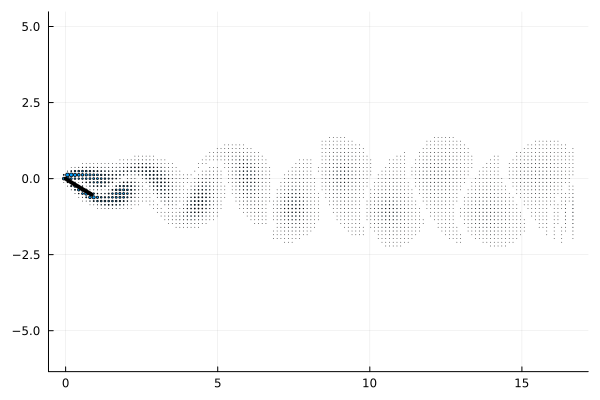

In [11]:
itr = 100
scatter(x[itr], y[itr], legend = :false, aspect_ratio = :equal, markersize = ω[itr]*20)
plot!(xb[:, itr], yb[:, itr], c = :black, linewidth = 4)

In [12]:
 FluidNetworkTools.plot_fluid_domain(x[itr], y[itr], ω[itr])
 p_save = plot!(xb[:, itr], yb[:, itr], c = :black, linewidth = 3)


savefig(p_save,"./plots/fluid_domain.png")

p_save


UndefVarError: UndefVarError: FluidNetworkTools not defined